<a href="https://colab.research.google.com/github/wozzin/AI_deeplearning/blob/main/NN_Winedata_Classification_add.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

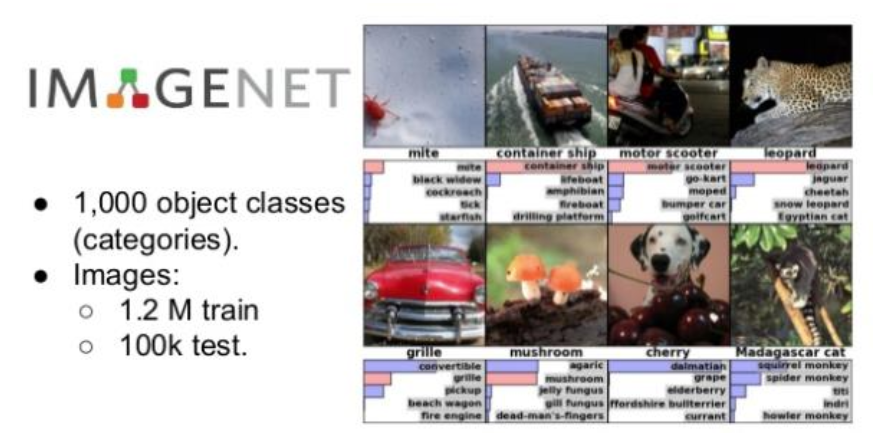

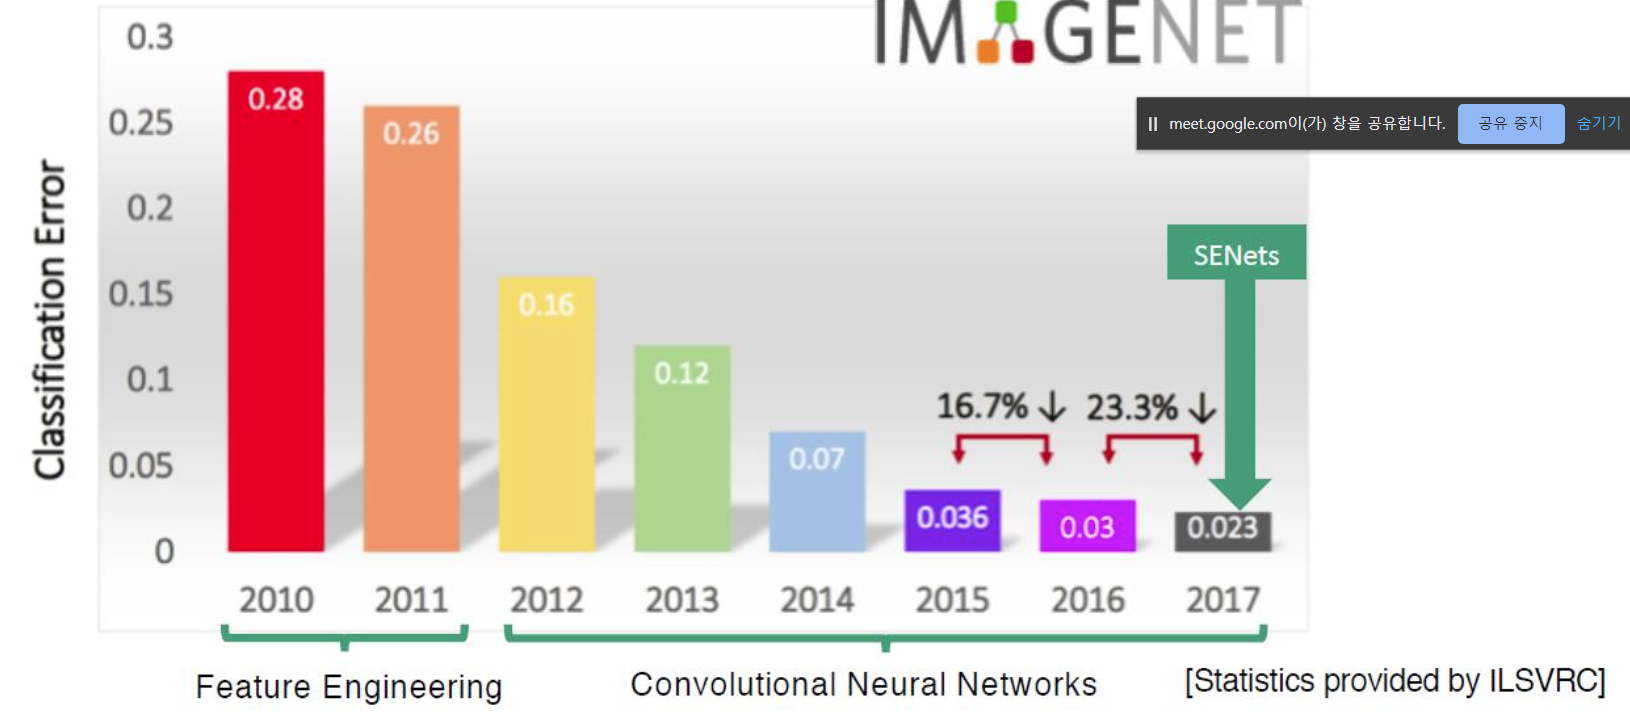

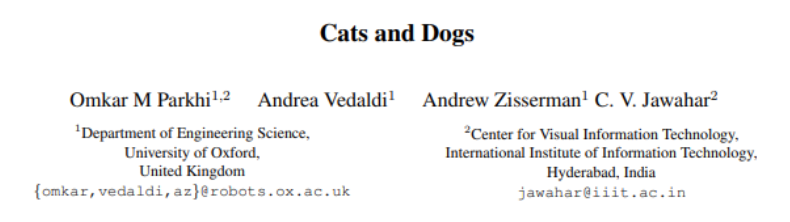

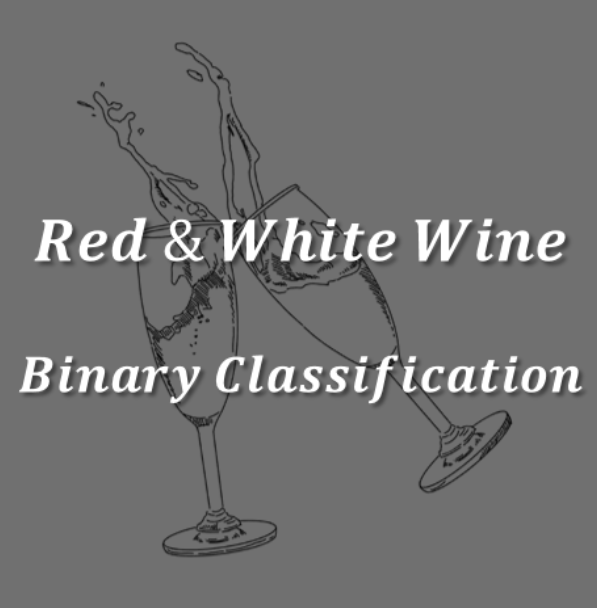

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
red = pd.read_csv('/content/drive/MyDrive/Deep/winequality-red.csv', sep = ';')
print(red.head())
white = pd.read_csv('/content/drive/MyDrive/Deep/winequality-white.csv', sep = ';')
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

In [10]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


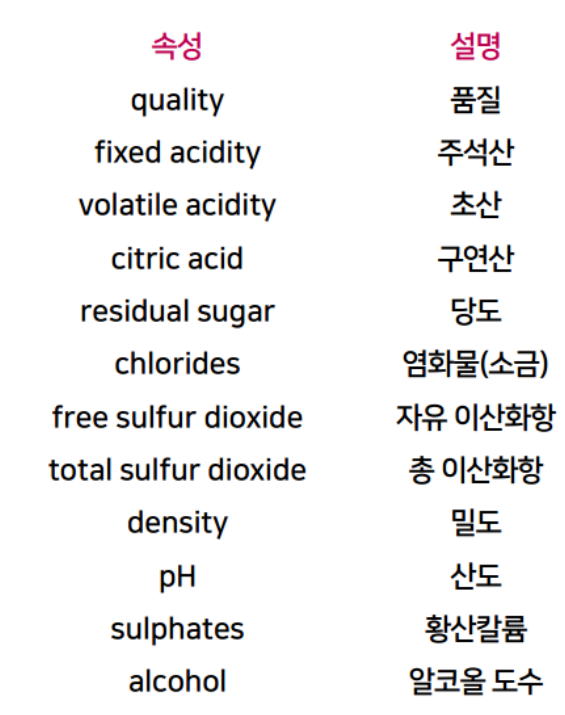

In [12]:
red['type']   = 0
white['type'] = 1

In [13]:
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70         0.00  ...      9.4        5     0
1            7.8              0.88         0.00  ...      9.8        5     0
2            7.8              0.76         0.04  ...      9.8        5     0
3           11.2              0.28         0.56  ...      9.8        6     0
4            7.4              0.70         0.00  ...      9.4        5     0

[5 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1
2            8.1              0.28         0.40  ...     10.1        6     1
3            7.2              0.23         0.32  ...      9.9        6     1
4            7.2              0.23         0.32  ...      9.9        6     1

[5 rows x 13 columns]


In [14]:
wine = pd.concat([red,white])
display(wine.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


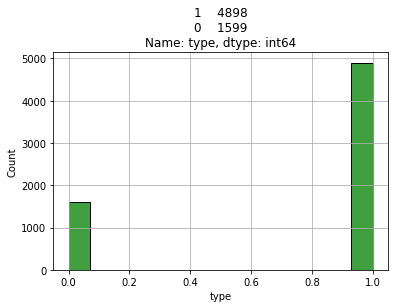

In [15]:
sns.histplot(wine['type'], color = 'green')
plt.title('{}'.format(wine['type'].value_counts()))

plt.grid()
plt.show()

# f1 - score 

In [16]:
wine_shuffle = wine.sample(frac=1)
print(wine_shuffle.head())

      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
784             7.2              0.23         0.19  ...      9.0        5     1
1638            7.6              0.47         0.49  ...      9.2        5     1
3297            6.5              0.25         0.50  ...      9.2        5     1
1799            6.4              0.26         0.21  ...      9.9        6     1
2121            7.7              0.39         0.28  ...     12.2        7     1

[5 rows x 13 columns]


In [17]:
wine_np = wine_shuffle.to_numpy()
print(type(wine_np))

<class 'numpy.ndarray'>


In [18]:
print("Total Dataset Index : ", len(wine_np))
train_idx = int(len(wine_np) * 0.8)
print("Train Dataset Index : ", train_idx)

Total Dataset Index :  6497
Train Dataset Index :  5197


In [19]:
train_X, train_Y = wine_np[ : train_idx, : -1], wine_np[:train_idx, -1] 
test_X, test_Y   = wine_np[ train_idx: , : -1], wine_np[train_idx :, -1]

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [20]:
train_X, train_Y = wine_np[ : train_idx, : -1], wine_np[:train_idx, -1  :  ] 
test_X, test_Y   = wine_np[ train_idx: , : -1], wine_np[train_idx :, -1 :  ]

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5197, 12)
(5197, 1)
(1300, 12)
(1300, 1)


In [21]:
train_X[0]

array([7.2000e+00, 2.3000e-01, 1.9000e-01, 1.3700e+01, 5.2000e-02,
       4.7000e+01, 1.9700e+02, 9.9865e-01, 3.1200e+00, 5.3000e-01,
       9.0000e+00, 5.0000e+00])

In [22]:
print(train_Y[0])
print(train_Y[1])
print(train_Y[2])

[1.]
[1.]
[1.]


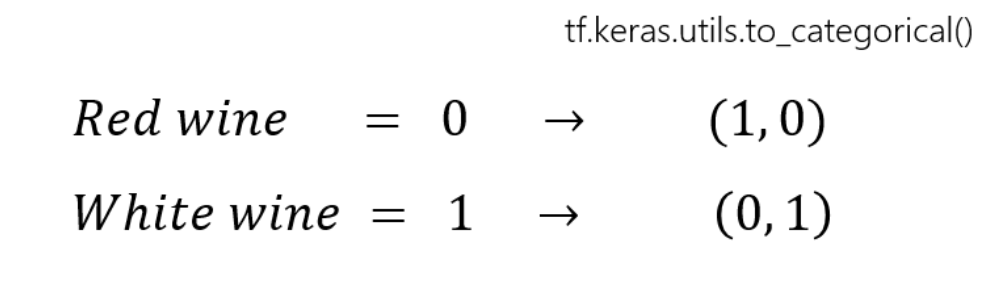

In [23]:
print(train_Y[0])
print(train_Y[1])
print(train_Y[2])

train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y, num_classes = 2)
test_Y_to_categorical = tf.keras.utils.to_categorical(test_Y,   num_classes = 2)

train_Y_to_categorical_5 = tf.keras.utils.to_categorical(train_Y, num_classes = 5)
print("===========================================")
print(train_Y_to_categorical[0])
print(train_Y_to_categorical[1])
print(train_Y_to_categorical[2])

print(train_Y_to_categorical_5[:5])

[1.]
[1.]
[1.]
[0. 1.]
[0. 1.]
[0. 1.]
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [24]:
print(train_Y_to_categorical.shape)
print(test_Y_to_categorical.shape)

(5197, 2)
(1300, 2)


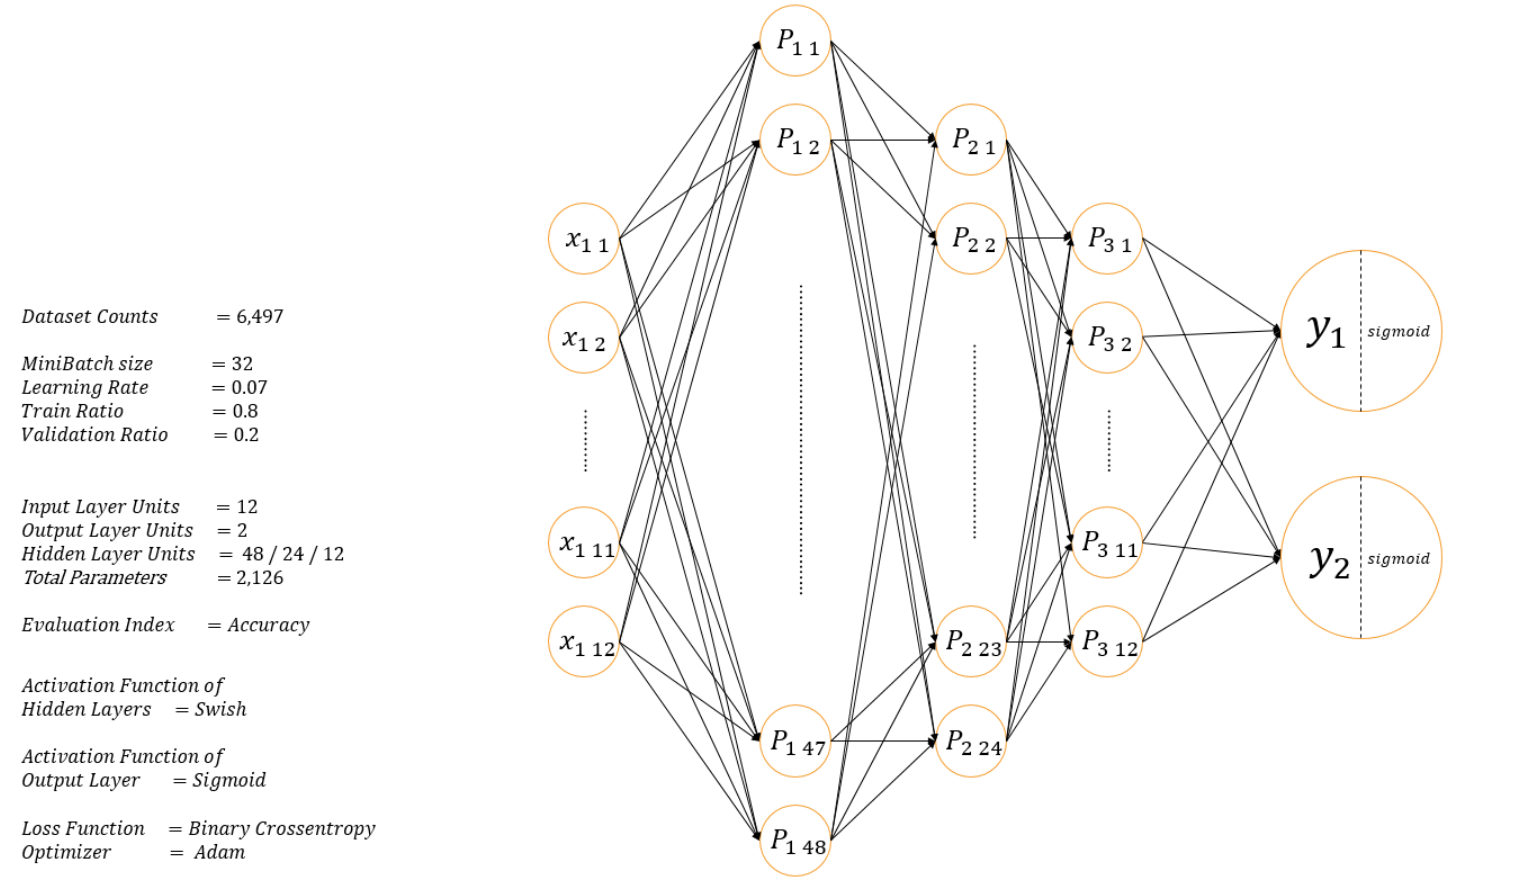

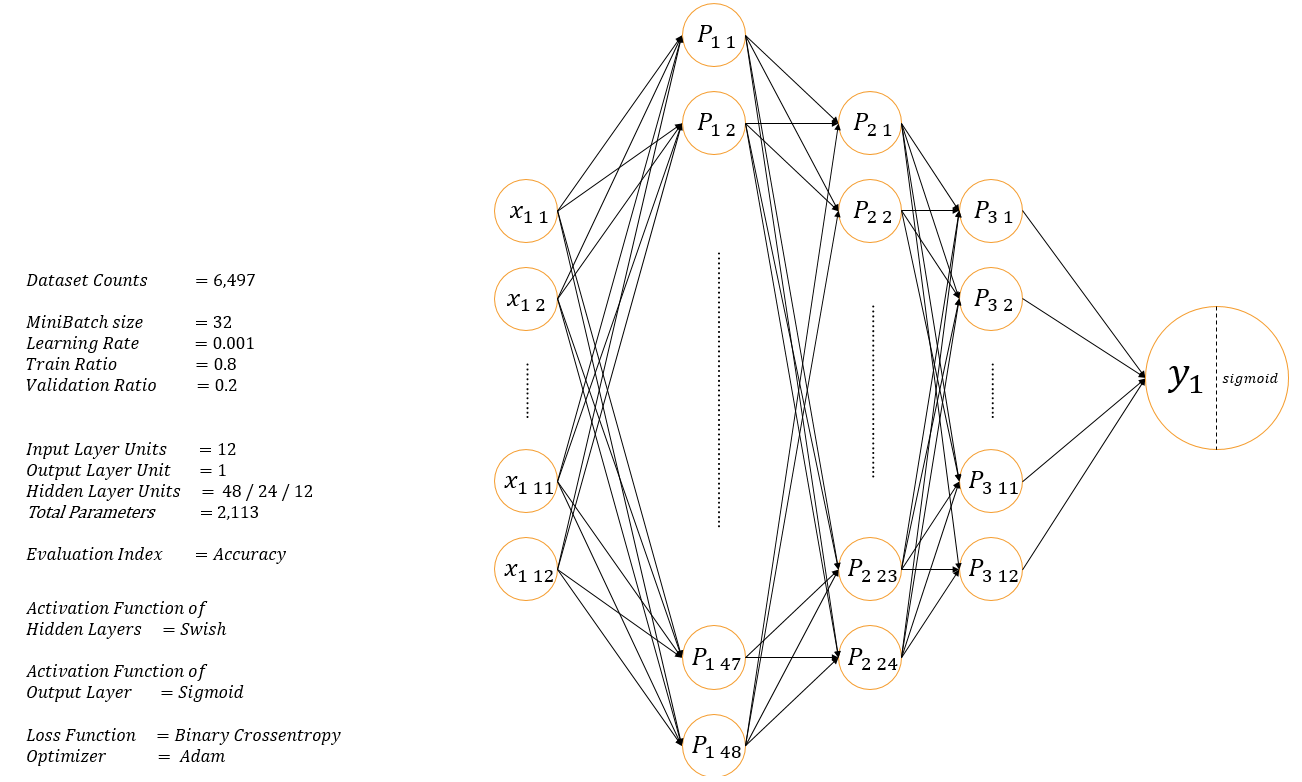

In [25]:
model_swish_sigmoid = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape = (12,)),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units=2, activation='sigmoid')
])

In [26]:
model_swish_sigmoid_no_onehot = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape = (12,)),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [27]:
model_swish_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model_swish_sigmoid.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_swish_sigmoid_no_onehot.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model_swish_sigmoid_no_onehot.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model_swish_sigmoid.fit(train_X, train_Y_to_categorical, epochs=25, batch_size=32, validation_split=0.2,
                                  callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5,
                                                                                monitor = 'val_loss')])

Epoch 1/25
130/130 [==============================] - 1s 4ms/step - loss: 0.3693 - accuracy: 0.8975 - val_loss: 0.2064 - val_accuracy: 0.9394
Epoch 2/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9350 - val_loss: 0.1708 - val_accuracy: 0.9481
Epoch 3/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.9401 - val_loss: 0.1511 - val_accuracy: 0.9490
Epoch 4/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9492 - val_loss: 0.1364 - val_accuracy: 0.9654
Epoch 5/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9536 - val_loss: 0.1710 - val_accuracy: 0.9577
Epoch 6/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9596 - val_loss: 0.1008 - val_accuracy: 0.9673
Epoch 7/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9613 - val_loss: 0.1114 - val_accuracy: 0.9625
Epoch 

In [30]:
history = model_swish_sigmoid_no_onehot.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.2,
                                            callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5,
                                                                                          monitor = 'val_loss')])

Epoch 1/25
130/130 [==============================] - 1s 3ms/step - loss: 0.7073 - accuracy: 0.8357 - val_loss: 0.1879 - val_accuracy: 0.9394
Epoch 2/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9300 - val_loss: 0.1697 - val_accuracy: 0.9433
Epoch 3/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9375 - val_loss: 0.1578 - val_accuracy: 0.9462
Epoch 4/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1678 - accuracy: 0.9420 - val_loss: 0.1308 - val_accuracy: 0.9606
Epoch 5/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1455 - accuracy: 0.9488 - val_loss: 0.1260 - val_accuracy: 0.9567
Epoch 6/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1400 - accuracy: 0.9452 - val_loss: 0.1075 - val_accuracy: 0.9644
Epoch 7/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.9555 - val_loss: 0.1030 - val_accuracy: 0.9644
Epoch 

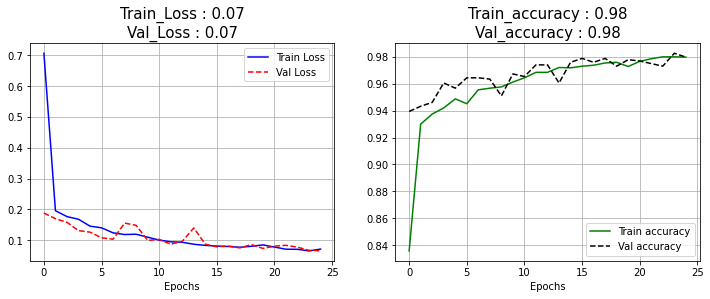

In [31]:
val_accuracy = history.history['val_accuracy']
accuracy     = history.history['accuracy']

val_loss = history.history['val_loss']
loss     = history.history['loss']

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val Loss')

plt.xlabel('Epochs')
plt.title("Train_Loss : {:.2f}\nVal_Loss : {:.2f}".format(loss[-1], val_loss[-1]),
          fontsize = 15)

plt.legend()
plt.grid()


plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], 'g-', label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'Val accuracy')

plt.xlabel('Epochs')
plt.title("Train_accuracy : {:.2f}\nVal_accuracy : {:.2f}".format(accuracy[-1], val_accuracy[-1]),
          fontsize = 15)

plt.legend()
plt.grid()

plt.show()


In [32]:
model_swish_sigmoid.evaluate(test_X, test_Y_to_categorical)

41/41 [==============================] - 0s 1ms/step - loss: 0.0666 - accuracy: 0.9769


[0.06663266569375992, 0.9769230484962463]

In [33]:
model_swish_sigmoid_no_onehot.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0674 - accuracy: 0.9785


[0.06742456555366516, 0.9784615635871887]

In [34]:
pred_Y = model_swish_sigmoid.predict(test_X)
print(np.round(pred_Y[:20] ,2))

[[0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.71 0.26]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.01 0.99]
 [1.   0.  ]
 [0.   1.  ]]


In [35]:
pred_Y = model_swish_sigmoid_no_onehot.predict(test_X)
print(np.round(pred_Y[:20] ,2))

[[1.  ]
 [1.  ]
 [1.  ]
 [0.98]
 [0.99]
 [0.99]
 [1.  ]
 [1.  ]
 [0.99]
 [0.98]
 [1.  ]
 [0.99]
 [1.  ]
 [0.13]
 [1.  ]
 [0.99]
 [1.  ]
 [0.98]
 [0.  ]
 [1.  ]]


In [36]:
pred_Y = np.round(pred_Y)
print(pred_Y[:20])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [37]:
print(test_Y_to_categorical[:20])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [38]:
model_swish_sigmoid.save('model_swish_sigmoid.h5')

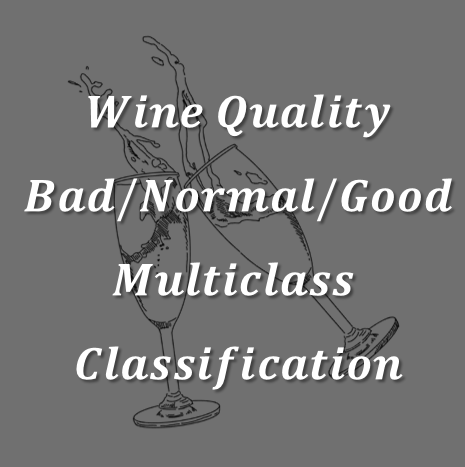

In [39]:
print(wine['quality'].describe())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


In [40]:
print(wine['quality'].value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

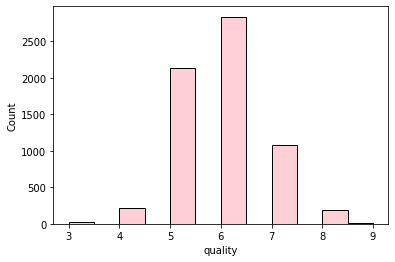

In [42]:
sns.histplot(wine['quality'], color = 'pink', binwidth = 0.5)
plt.show()

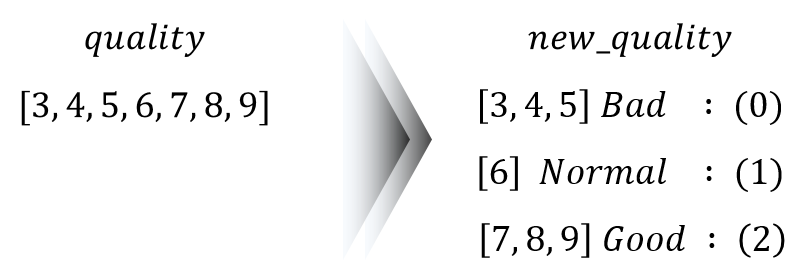

In [43]:
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].value_counts())

1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


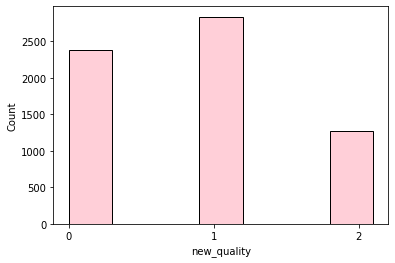

In [44]:
sns.histplot(wine['new_quality'], color='pink', binwidth=0.3)
plt.xticks(ticks=[0,2,1])
plt.show()

In [45]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,2.0


In [46]:
del wine['quality']
display(wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,2.0


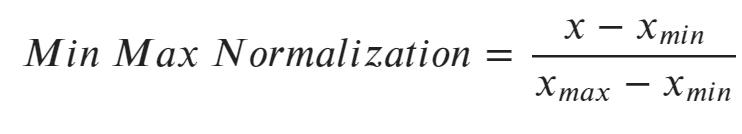

In [47]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

In [48]:
display(wine['new_quality'][:10])

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
5    0.0
6    0.0
7    2.0
8    2.0
9    0.0
Name: new_quality, dtype: float64

In [49]:
display(wine_norm['new_quality'][:10])

0    0.0
1    0.0
2    0.0
3    0.5
4    0.0
5    0.0
6    0.0
7    1.0
8    1.0
9    0.0
Name: new_quality, dtype: float64

In [50]:
wine_shuffle = wine_norm.sample(frac=1)
wine_np      = wine_shuffle.to_numpy()

In [51]:
train_ratio = 0.8 

train_idx = int(len(wine_np) * train_ratio)
print("train_idx : ", train_idx)

train_idx :  5197


In [52]:
train_X, train_Y = wine_np[ : train_idx, : -1], wine_np[  : train_idx, -1 : ]
test_X, test_Y   = wine_np[ train_idx: , : -1], wine_np[ train_idx : , -1 : ]

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5197, 12)
(5197, 1)
(1300, 12)
(1300, 1)


In [53]:
train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y, num_classes = 3)
test_Y_to_categorical = tf.keras.utils.to_categorical(test_Y, num_classes = 3)

print(train_X.shape)
print(train_Y_to_categorical.shape)
print(test_X.shape)
print(test_Y_to_categorical.shape)

(5197, 12)
(5197, 3)
(1300, 12)
(1300, 3)


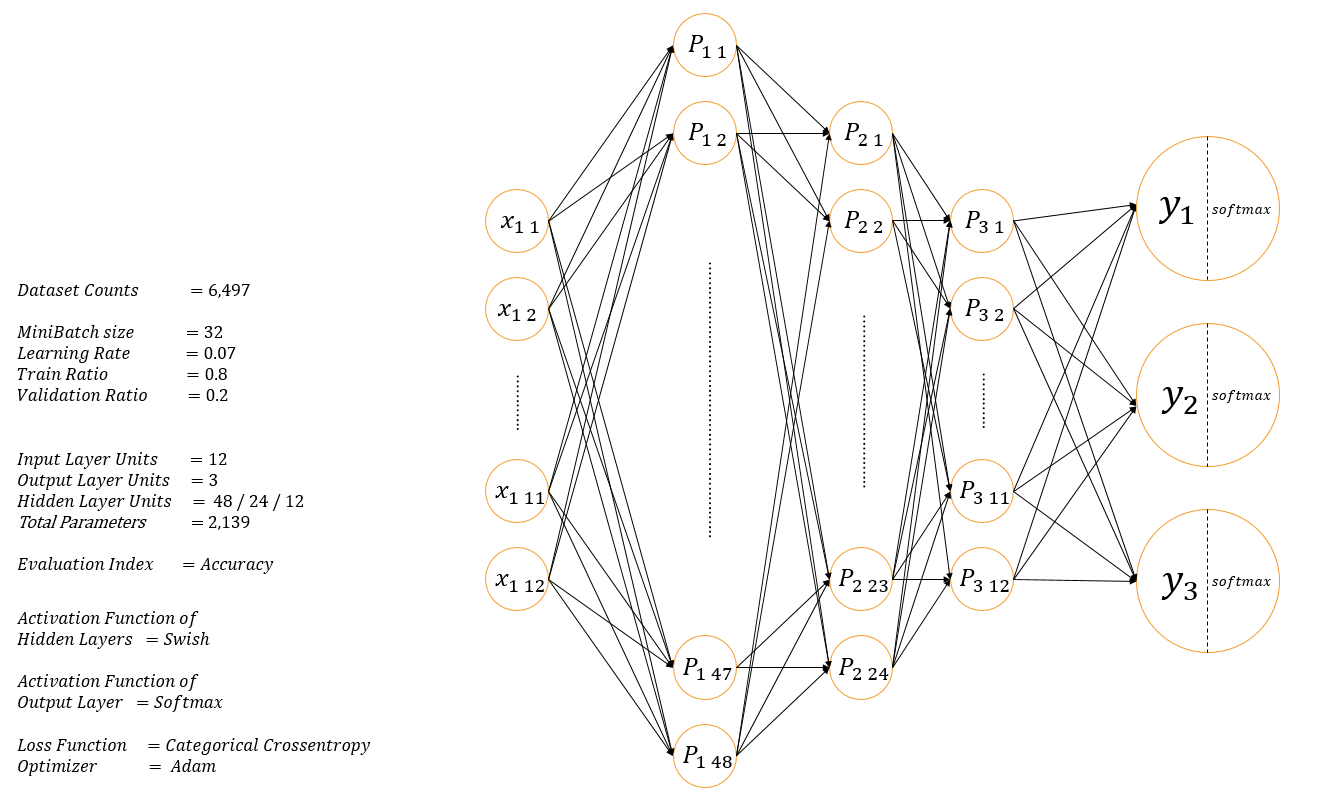

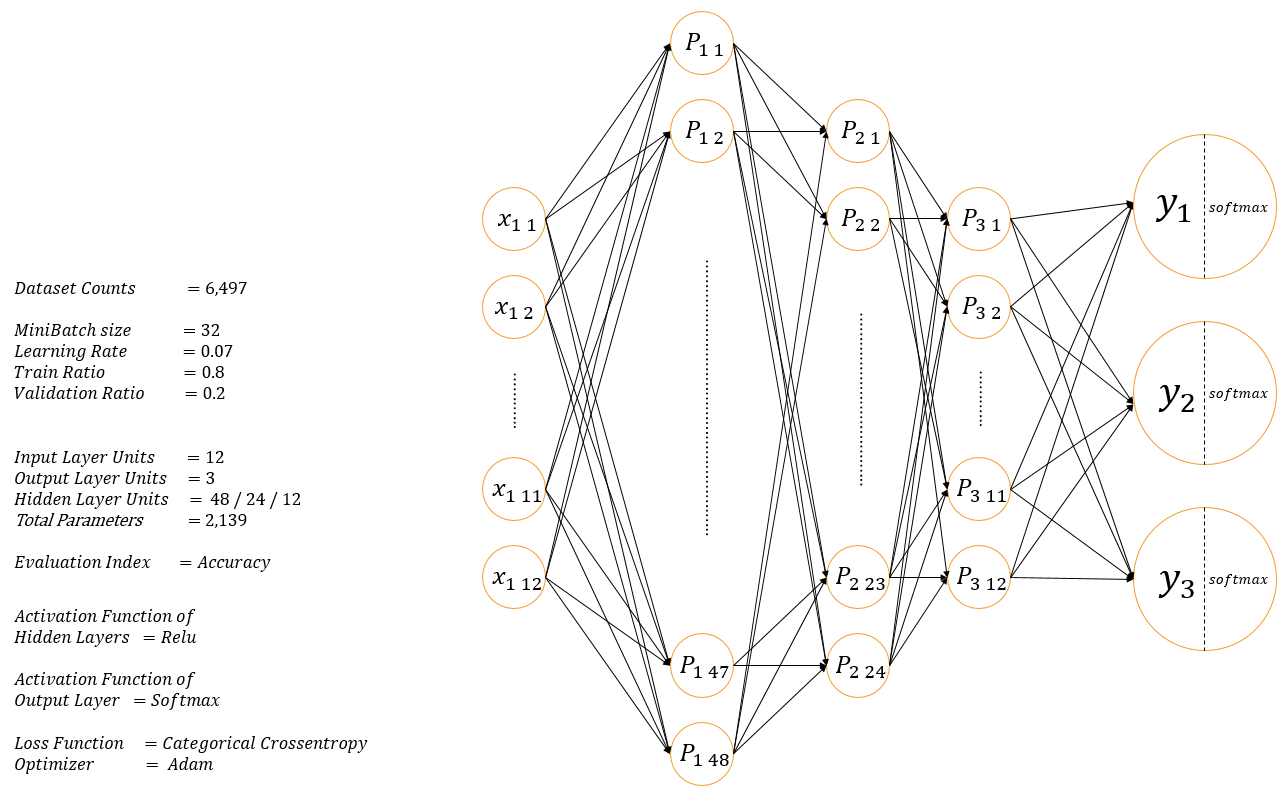

In [54]:
model_swish_softmax = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape = (12,)),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [55]:
model_relu_softmax = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='relu', input_shape = (12,)),
                                           tf.keras.layers.Dense(units=24, activation='relu'),
                                           tf.keras.layers.Dense(units=12, activation='relu'),
                                           tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [56]:
model_swish_softmax.compile(optimizer=tf.keras.optimizers.Adam(),
                            loss = 'categorical_crossentropy',
                            metrics=['accuracy'])

In [57]:
model_relu_softmax.compile(optimizer=tf.keras.optimizers.Adam(),
                            loss = 'categorical_crossentropy',
                            metrics=['accuracy'])

In [58]:
history = model_swish_softmax.fit(train_X, 
                                  train_Y_to_categorical,
                                  epochs = 50, 
                                  batch_size = 32,
                                  validation_split = 0.2,
                                  callbacks = [tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 0.6590 - accuracy: 0.7845 - val_loss: 0.4652 - val_accuracy: 0.7981
Epoch 2/50
130/130 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8044 - val_loss: 0.4299 - val_accuracy: 0.8029
Epoch 3/50
130/130 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8112 - val_loss: 0.4137 - val_accuracy: 0.8067
Epoch 4/50
130/130 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8160 - val_loss: 0.4127 - val_accuracy: 0.8038
Epoch 5/50
130/130 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8177 - val_loss: 0.4167 - val_accuracy: 0.7971
Epoch 6/50
130/130 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8148 - val_loss: 0.4109 - val_accuracy: 0.8106
Epoch 7/50
130/130 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8167 - val_loss: 0.4072 - val_accuracy: 0.8000
Epoch 

In [59]:
history = model_relu_softmax.fit(train_X, 
                                  train_Y_to_categorical,
                                  epochs = 50, 
                                  batch_size = 32,
                                  validation_split = 0.2,
                                  callbacks = [tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 0.6854 - accuracy: 0.7448 - val_loss: 0.4804 - val_accuracy: 0.7981
Epoch 2/50
130/130 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.8018 - val_loss: 0.4293 - val_accuracy: 0.7981
Epoch 3/50
130/130 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8061 - val_loss: 0.4412 - val_accuracy: 0.7923
Epoch 4/50
130/130 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8095 - val_loss: 0.4117 - val_accuracy: 0.8077
Epoch 5/50
130/130 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8140 - val_loss: 0.4120 - val_accuracy: 0.8038
Epoch 6/50
130/130 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8225 - val_loss: 0.4053 - val_accuracy: 0.8067
Epoch 7/50
130/130 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8208 - val_loss: 0.4117 - val_accuracy: 0.8087
Epoch 

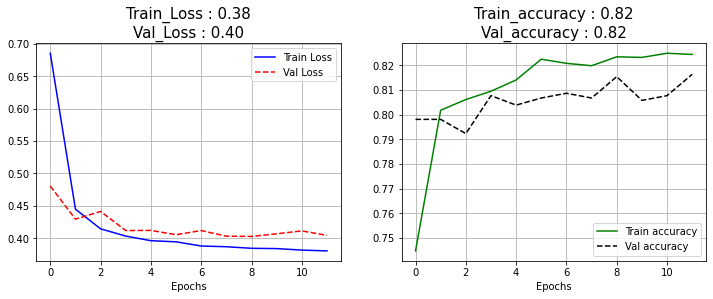

In [60]:
val_accuracy = history.history['val_accuracy']
accuracy     = history.history['accuracy']

val_loss = history.history['val_loss']
loss     = history.history['loss']

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val Loss')

plt.xlabel('Epochs')
plt.title("Train_Loss : {:.2f}\nVal_Loss : {:.2f}".format(loss[-1], val_loss[-1]),
          fontsize = 15)

plt.legend()
plt.grid()


plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], 'g-', label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'Val accuracy')

plt.xlabel('Epochs')
plt.title("Train_accuracy : {:.2f}\nVal_accuracy : {:.2f}".format(accuracy[-1], val_accuracy[-1]),
          fontsize = 15)

plt.legend()
plt.grid()

plt.show()


In [61]:
print(model_relu_softmax.evaluate(test_X, test_Y_to_categorical))
print(model_swish_softmax.evaluate(test_X, test_Y_to_categorical))

41/41 [==============================] - 0s 1ms/step - loss: 0.3849 - accuracy: 0.8223
[0.38489678502082825, 0.8223077058792114]
41/41 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8162
[0.3946121335029602, 0.8161538243293762]


In [62]:
model_swish_softmax.save('model_swish_softmax.h5')

In [63]:
pred_Y = model_swish_softmax.predict(test_X)
print("pred_Y:\n" , pred_Y[:5])
pred_Y = np.round(pred_Y)
print("pred_Y:\n", pred_Y[:5])

pred_Y:
 [[8.0990148e-01 1.8988700e-01 2.1154185e-04]
 [4.8646504e-01 5.1343948e-01 9.5418472e-05]
 [7.4327809e-01 2.5642028e-01 3.0158219e-04]
 [3.5861817e-01 6.4134508e-01 3.6695837e-05]
 [5.5924517e-01 4.4047770e-01 2.7712577e-04]]
pred_Y:
 [[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [64]:
test_Y_to_categorical[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [65]:
pred_Y_argmax = np.argmax(pred_Y, axis = 1)
print(pred_Y_argmax[:10])
test_Y_to_categorical_argmax = np.argmax(test_Y_to_categorical, axis = 1)
print(test_Y_to_categorical_argmax[:10])

[0 1 0 1 0 0 0 1 0 1]
[0 1 0 0 0 0 0 1 0 0]


In [66]:
result = np.equal(pred_Y_argmax, test_Y_to_categorical_argmax)
print("ACC : {:.3f} ".format(np.mean(result) * 100))

ACC : 81.615 
